# 1. Objetivo
El propósito principal es agrupar a los clientes según variables relevantes. En el Mall Customers Dataset, se cuenta con:
- Edad
- Género
- Ingresos Anuales (k$)
- Puntuación de Gasto (Spending Score)

La segmentación busca descubrir patrones ocultos, como perfiles de clientes con alto poder adquisitivo y alto gasto, clientes con bajos ingresos pero gasto moderado, etc.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [7]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.Age.max()

70

In [6]:
df['Spending Score (1-100)'].max()

99

In [13]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [14]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]

In [16]:
kmeans = KMeans(n_clusters=4, random_state=42)  # 4 clústeres según el método del codo
df['Cluster'] = kmeans.fit_predict(X)

C:\Users\anala\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


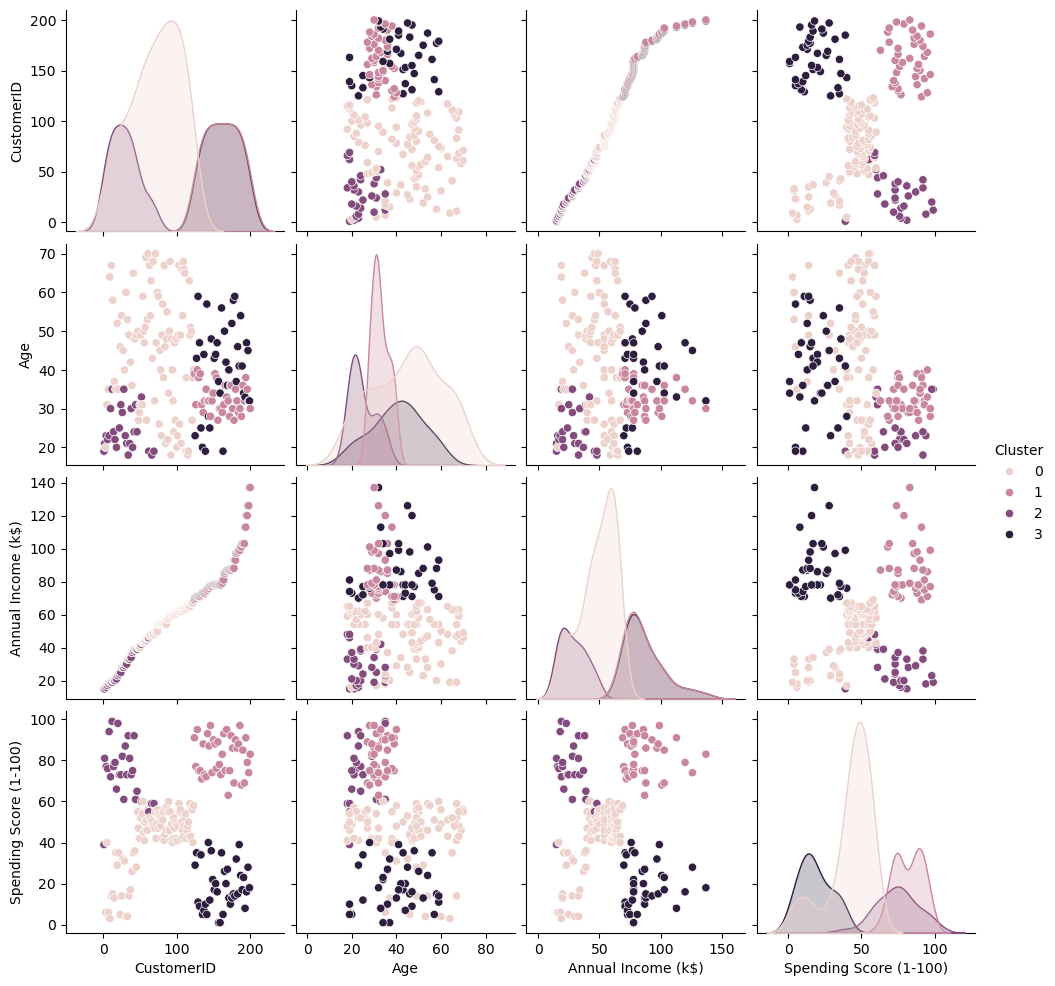

In [18]:
sns.pairplot(df, hue ="Cluster")
plt.show()

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

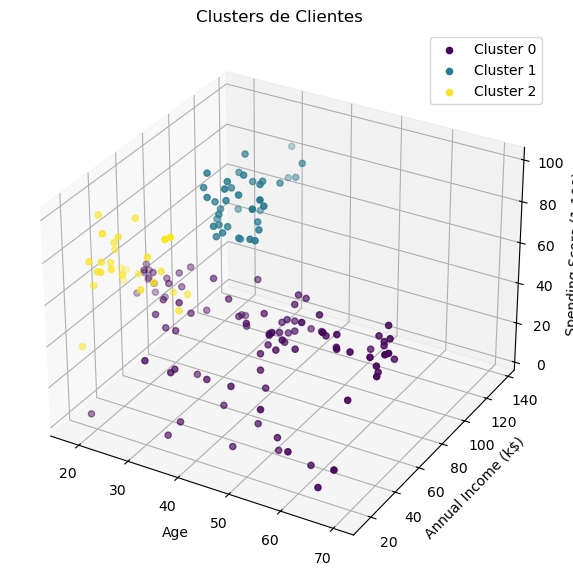

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Cluster  
0          2  
1          2  
2          0  
3          2  
4          0

In [29]:
# Visualización en 3D de los clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Asignar colores a los clusters
colors = ['#450558', '#287A8E', '#F8E621']
for i in range(3):
    ax.scatter(df.loc[df["Cluster"] == i, "Age"], 
               df.loc[df["Cluster"] == i, "Annual Income (k$)"], 
               df.loc[df["Cluster"] == i, "Spending Score (1-100)"], 
               label=f'Cluster {i}', color=colors[i])

# Etiquetas y título
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.set_title("Clusters de Clientes")
ax.legend()
plt.show()

# Mostrar el DataFrame con los clusters asignados
print(df)